In [12]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [17]:
data = pd.read_csv('/home/lamontano/Desktop/Capstone2/STP140_4_5kW.csv')  # load data set
X = data.iloc[:, 1:5].values
Y = data.iloc[:,1:5].values
print(data.head)

<bound method NDFrame.head of      Thrust    Pressure
0  0.000003  278.530392
1  0.000003  279.278918
2  0.000004  282.067104
3  0.000004  282.814596
4  0.000005  283.833736
5  0.000007  287.639913
6  0.000010  290.627468
7  0.000016  295.175162
8  0.000024  297.270553
9  0.000034  298.817936>


In [18]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y,  test_size = 0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(8, 1) (8, 1)
(2, 1) (2, 1)


In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

LR = LinearRegression()
model = LR.fit(X_train, Y_train)
y_predictions = LR.predict(X_test)

In [20]:
print(model.score(X_test,Y_test))

0.8990411038623023


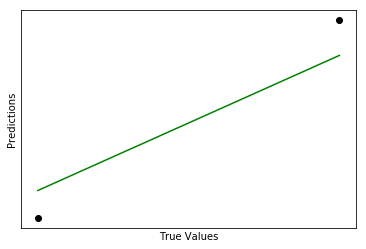

In [21]:
# Plot Linear Regression
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, y_predictions, color='green')

plt.xticks(())
plt.yticks(())
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

In [22]:
kf = KFold(n_splits = 2)
kf.get_n_splits(X)
print(kf)

KFold(n_splits = 2, random_state = None, shuffle = True)

for train_index, test_index in kf.split(X):
    #print("Train: ", train_index, "Test: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
score = cross_val_score(LinearRegression(), X_test, Y_test, cv = 2)

print('Cross-validated scores: ', score)

KFold(n_splits=2, random_state=None, shuffle=False)
Cross-validated scores:  [1. 1.]


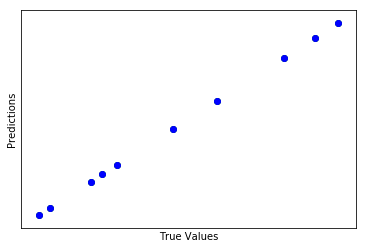

In [23]:
#Make cross validation predictions 
predictions = cross_val_predict(LinearRegression(),X, Y, cv = 2)
plt.scatter(X, Y,  color='green')
plt.scatter(Y,predictions, color = 'blue' )
plt.xticks(())
plt.yticks(())
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [27]:
accuracy = metrics.r2_score(Y, predictions)
print('Cross-Predicted Accuracy: ', accuracy)

Cross-Predicted Accuracy:  1.0
